# Установка необходимых библиотек

Для корректной работы проекта необходимо установить следующие сторонние библиотеки Python.

## Список зависимостей

- [`gdown`](https://pypi.org/project/gdown/) — загрузка файлов с Google Drive  
- [`numpy`](https://numpy.org/) — работа с числовыми массивами  
- [`pandas`](https://pandas.pydata.org/) — обработка и анализ табличных данных  
- [`matplotlib`](https://matplotlib.org/) — визуализация данных  
- [`seaborn`](https://seaborn.pydata.org/) — статистическая визуализация  
- [`scikit-learn`](https://scikit-learn.org/) — инструменты машинного обучения  
- [`catboost`](https://catboost.ai/) — градиентный бустинг от Яндекса  
- [`xgboost`](https://xgboost.readthedocs.io/) — масштабируемый градиентный бустинг

## Установка зависимостей

### Через терминал (командная строка):

```bash
pip install gdown numpy pandas matplotlib seaborn scikit-learn catboost xgboost

In [3]:
import gdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. EDA и Предобработка данных

### 1.1 Скачивание данных

In [6]:
url = 'https://drive.google.com/uc?export=download&id=1YHw-ZszkSkLo3UwtPu6fWABJGU6kRJJb'
output = 'df_train.csv'
gdown.download(url, output, quiet=False)
data_train = pd.read_csv(output)
url = 'https://drive.google.com/uc?export=download&id=1YQUMyFUdV-1FQWxpIZ0FugQtQqmgWVi-'
output = 'df_test.csv'
gdown.download(url, output, quiet=False)
data_test = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?export=download&id=1YHw-ZszkSkLo3UwtPu6fWABJGU6kRJJb
To: /home/fedor/Рабочий стол/HACK WB/df_train.csv
100%|██████████████████████████████████████████████████████| 11.7M/11.7M [00:44<00:00, 261kB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1YQUMyFUdV-1FQWxpIZ0FugQtQqmgWVi-
To: /home/fedor/Рабочий стол/HACK WB/df_test.csv
100%|██████████████████████████████████████████████████████| 1.60M/1.60M [00:01<00:00, 939kB/s]


In [7]:
data_train.head()

,user_id,nm_id,CreatedDate,service,total_ordered,PaymentType,IsPaid,count_items,unique_items,avg_unique_purchase,...,NmAge,Distance,DaysAfterRegistration,number_of_orders,number_of_ordered_items,mean_number_of_ordered_items,min_number_of_ordered_items,max_number_of_ordered_items,mean_percent_of_ordered_items,target
0,1,1,2025-01-05 02:20:24+03:00,nnsz,627,CSH,False,4,4,1.00,...,117,3443,73,1,627,627.0,627,627,100.000000,0
1,2,2,2024-11-05 09:05:21+03:00,nnsz,512,CRD,True,0,0,0.00,...,920,3478,1237,2,606,303.0,94,512,50.000000,0
2,3,3,2024-12-11 13:45:33+03:00,nnsz,500,CRD,True,0,0,0.00,...,420,771,4003,1,500,500.0,500,500,100.000000,0
3,4,4,2025-01-24 07:47:34+03:00,nnsz,452,CSH,False,6,2,0.33,...,20112,763,977,5,1102,220.4,100,452,20.000000,0
4,5,5,2024-11-27 11:50:43+03:00,nnsz,450,CRD,True,0,0,0.00,...,141,1089,1637,3,549,183.0,1,450,33.333333,0


In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105565 entries, 0 to 105564
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   user_id                        105565 non-null  int64  
 1   nm_id                          105565 non-null  int64  
 2   CreatedDate                    105565 non-null  object 
 3   service                        105565 non-null  object 
 4   total_ordered                  105565 non-null  int64  
 5   PaymentType                    105565 non-null  object 
 6   IsPaid                         105565 non-null  bool   
 7   count_items                    105565 non-null  int64  
 8   unique_items                   105565 non-null  int64  
 9   avg_unique_purchase            105565 non-null  float64
 10  is_courier                     105565 non-null  int64  
 11  NmAge                          105565 non-null  int64  
 12  Distance                      

### 1.2 Просмотр дисбаланса классов

In [10]:
print(f'{np.sum(data_train['target']) / len(data_train['target'])}')
print(f'{np.sum(data_test['target']) / len(data_test['target'])}')

0.12650026050300764
0.12663908561811935


In [11]:
np.sum(data_train['target'])

13354

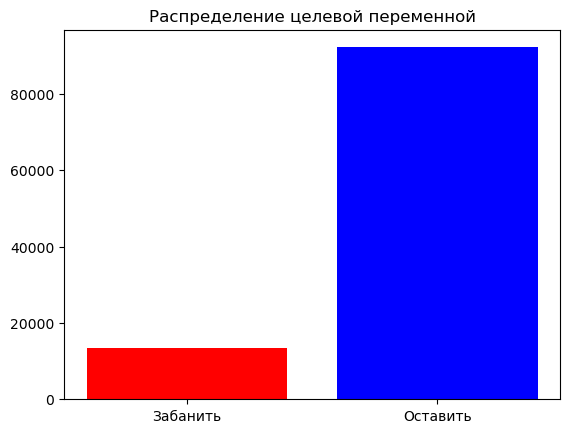

In [12]:
target = data_train['target'].value_counts()

plt.bar(['Забанить', 'Оставить'], [target.get(1, 0), target.get(0, 0)], color=['red', 'blue'])
plt.title('Распределение целевой переменной')
plt.show()

### 1.3 Работа с выбросами

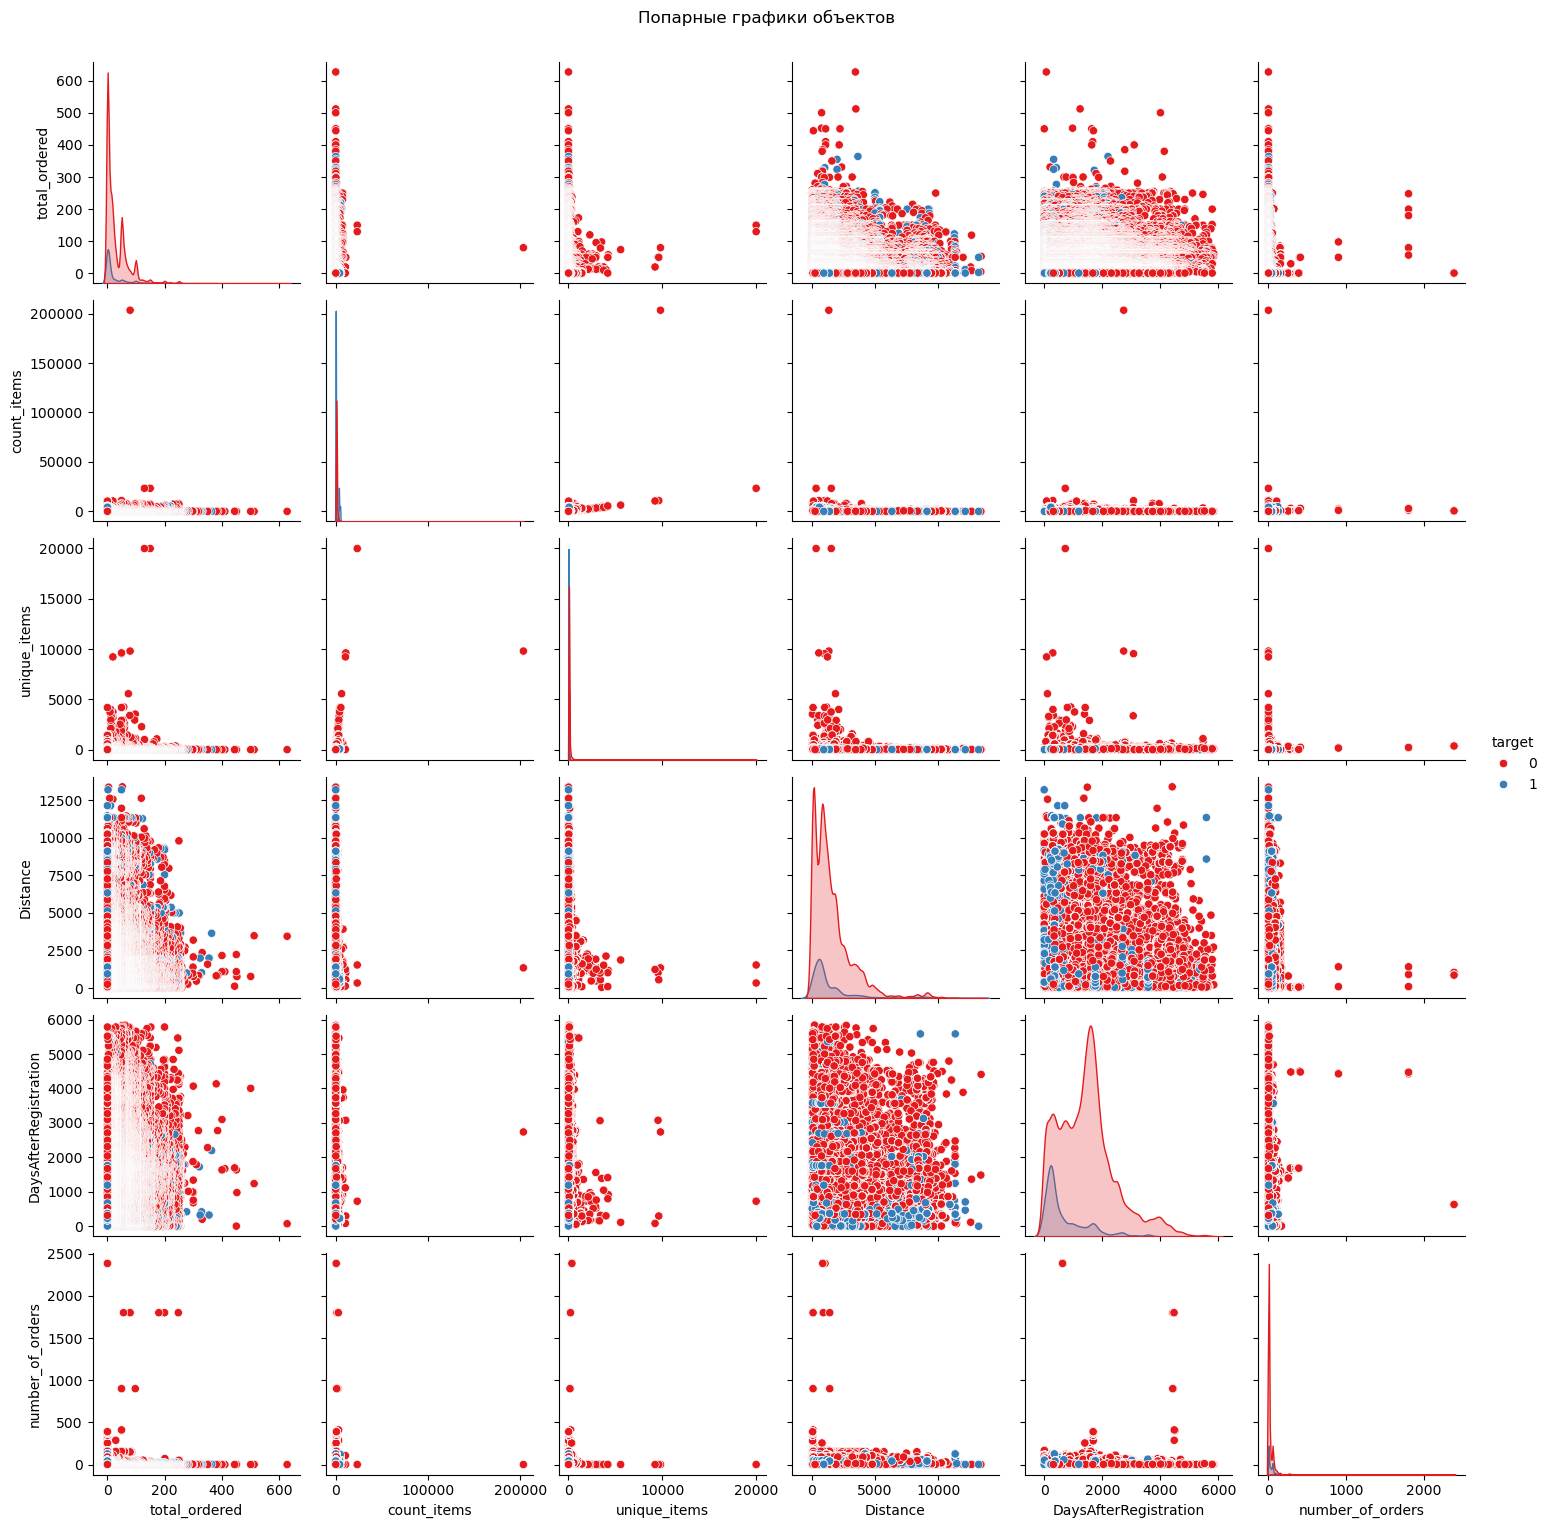

In [14]:
selected_features = ['total_ordered', 'count_items', 'unique_items', 'Distance',
                     'DaysAfterRegistration', 'number_of_orders', 'target']

sns.pairplot(data_train[selected_features], hue='target', palette='Set1', diag_kind='kde')
plt.suptitle('Попарные графики объектов', y=1.02)
plt.show()

In [15]:
data_train = data_train[data_train['total_ordered'] <= 400]
data_train = data_train[data_train['count_items'] <= 6000]
data_train = data_train[data_train['unique_items'] <= 600]
data_train = data_train[data_train['number_of_orders'] <= 130]

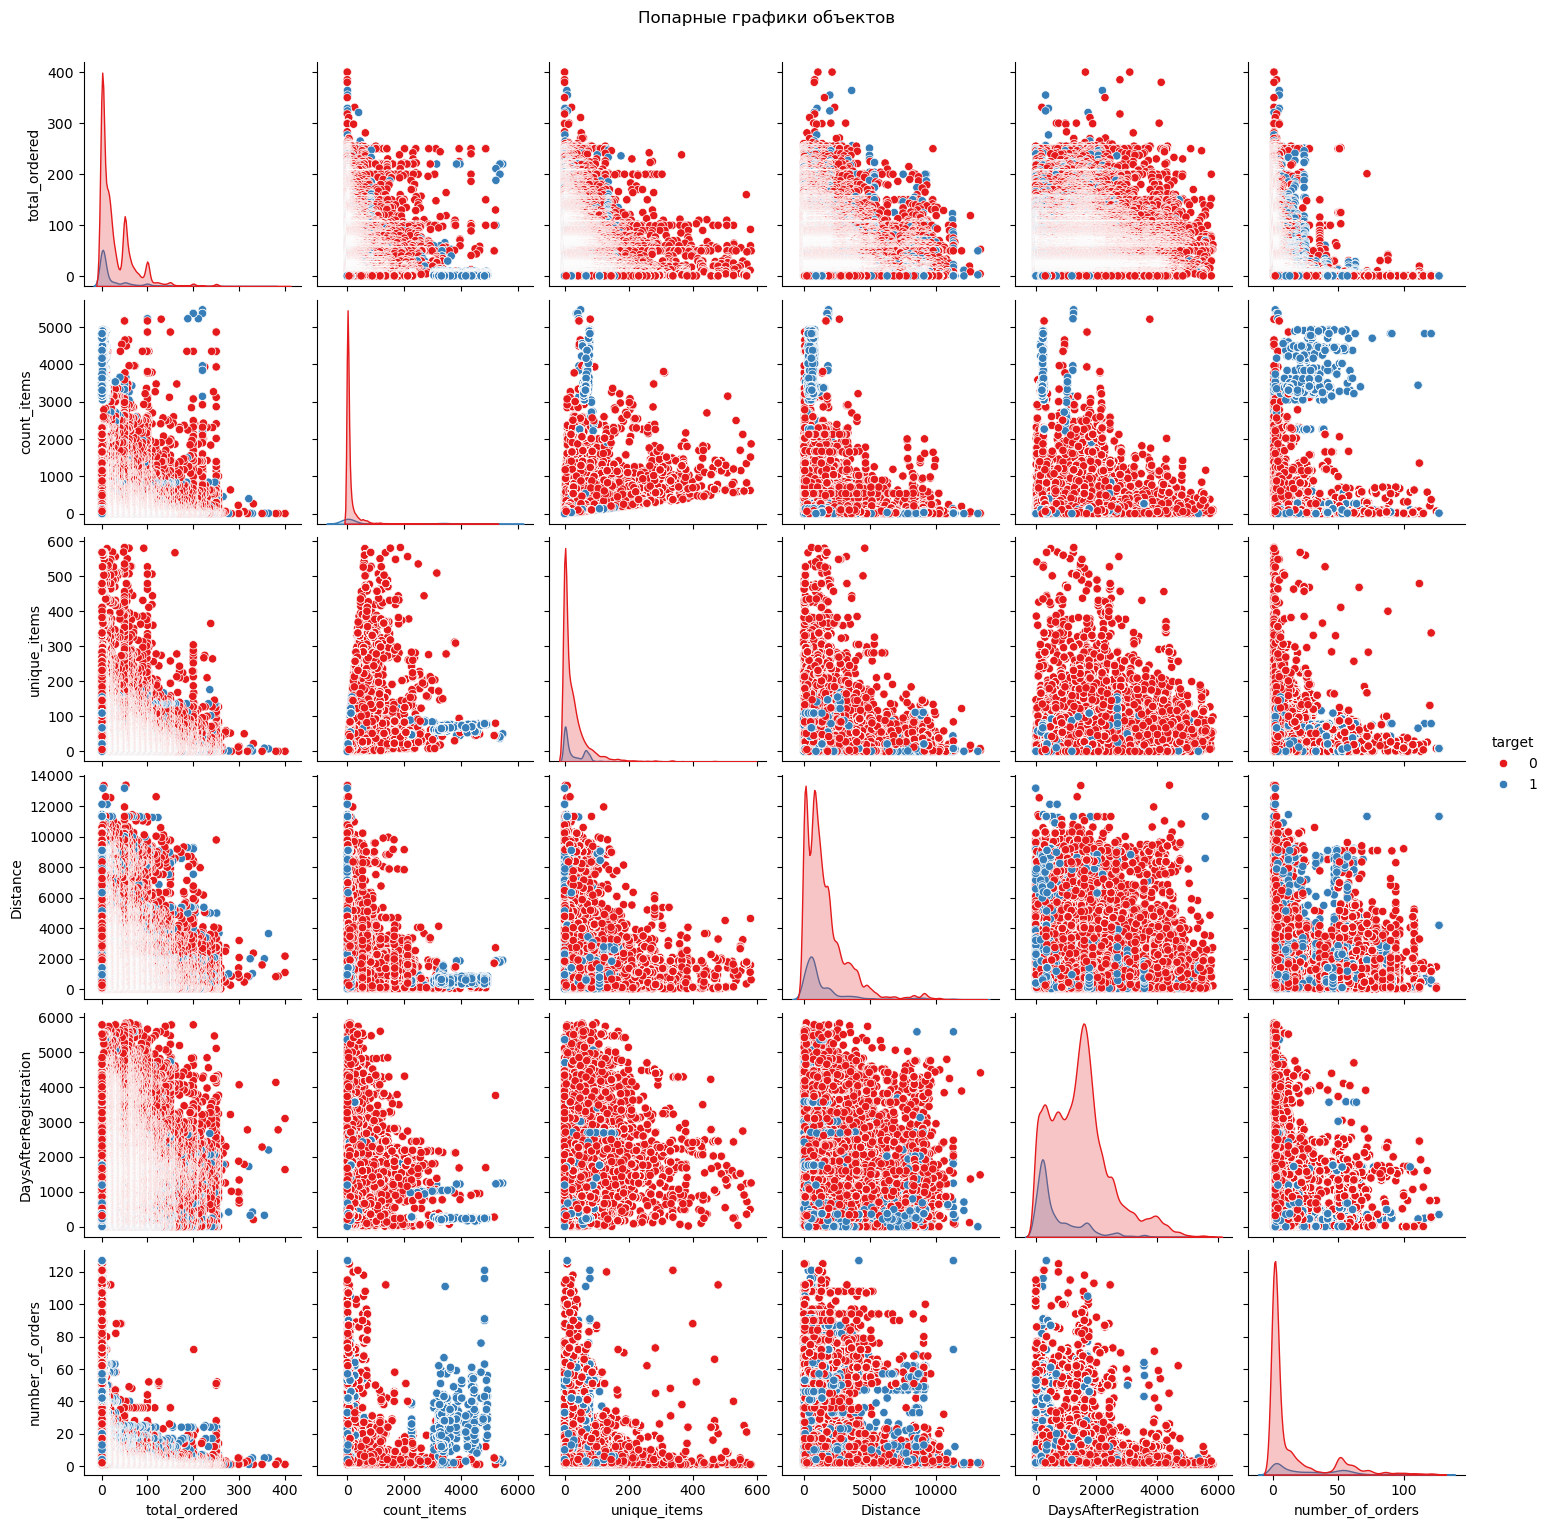

In [16]:
selected_features = ['total_ordered', 'count_items', 'unique_items', 'Distance',
                     'DaysAfterRegistration', 'number_of_orders', 'target']

sns.pairplot(data_train[selected_features], hue='target', palette='Set1', diag_kind='kde')
plt.suptitle('Попарные графики объектов', y=1.02)
plt.show()

In [17]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103390 entries, 8 to 105564
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   user_id                        103390 non-null  int64  
 1   nm_id                          103390 non-null  int64  
 2   CreatedDate                    103390 non-null  object 
 3   service                        103390 non-null  object 
 4   total_ordered                  103390 non-null  int64  
 5   PaymentType                    103390 non-null  object 
 6   IsPaid                         103390 non-null  bool   
 7   count_items                    103390 non-null  int64  
 8   unique_items                   103390 non-null  int64  
 9   avg_unique_purchase            103390 non-null  float64
 10  is_courier                     103390 non-null  int64  
 11  NmAge                          103390 non-null  int64  
 12  Distance                       1033

In [18]:
print('Количество типов оплаты -', data_train['PaymentType'].nunique())
for i in data_train['PaymentType'].unique():
    print(f'{i} - {data_train['PaymentType'].value_counts()[i]}')

Количество типов оплаты - 11
CRD - 25527
CSH - 67369
BAL - 7477
QRS - 190
MPM - 2160
CRE - 59
WPG - 79
PDL - 454
ACC - 73
CIN - 1
CWB - 1


In [19]:
data_train = data_train[~data_train['PaymentType'].isin(['CIN', 'CWB'])]

In [20]:
num_cols = data_train.select_dtypes(include=['int64','float64']).columns
data_train[num_cols].describe(percentiles=[.01,.25,.5,.75,.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
user_id,103388.0,21292.149408,12387.090412,2.000000,91.000000,9635.000000,22761.500000,34296.00,35407.0,35433.0
nm_id,103388.0,19574.857653,13380.764927,2.000000,51.000000,6263.000000,20918.500000,33674.25,37201.0,37224.0
total_ordered,103388.0,30.504459,40.420768,1.000000,1.000000,1.000000,14.000000,50.00,200.0,400.0
count_items,103388.0,230.956765,712.819575,0.000000,0.000000,0.000000,21.000000,99.00,4224.0,5466.0
unique_items,103388.0,30.004217,51.759752,0.000000,0.000000,0.000000,12.000000,39.00,269.0,582.0
avg_unique_purchase,103388.0,0.404569,0.407574,0.000000,0.000000,0.000000,0.250000,0.86,1.0,1.0
is_courier,103388.0,0.013512,0.115455,0.000000,0.000000,0.000000,0.000000,0.00,1.0,1.0
NmAge,103388.0,5539.358736,8678.928353,0.000000,4.000000,153.000000,360.000000,20004.00,20112.0,20120.0
Distance,103388.0,1575.607188,1663.979167,6.000000,35.000000,499.000000,1092.000000,2026.00,8978.0,13381.0
DaysAfterRegistration,103388.0,1366.996296,1002.077706,0.000000,0.000000,540.000000,1332.000000,1855.00,4337.0,5839.0


### 1.4 Обработка категориальных признаков

In [22]:
def preprocess_base(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['CreatedDate'] = pd.to_datetime(df['CreatedDate'], errors='coerce')
    df['year']    = df['CreatedDate'].dt.year
    df['month']   = df['CreatedDate'].dt.month
    df['weekday'] = df['CreatedDate'].dt.weekday
    df['weekend'] = (df['weekday'] >= 5).astype(int)

    df.drop([
        'mean_percent_of_ordered_items',
        'min_number_of_ordered_items',
        'max_number_of_ordered_items'
    ], axis=1, inplace=True, errors='ignore')
    valid_payment_types = {'CRD', 'CSH', 'BAL', 'QRS', 'MPM', 'CRE', 'WPG', 'PDL', 'ACC'}
    df['PaymentType'] = df['PaymentType'].where(df['PaymentType'].isin(valid_payment_types), 'CRD')

    df = pd.get_dummies(df, columns=['service', 'PaymentType'], dtype=int)

    for col in df.select_dtypes(include='bool').columns:
        df[col] = df[col].astype(int)

    return df


In [23]:
data_train = preprocess_base(data_train)

### 1.5 Добавление новых признаков

In [25]:
def add_features(df : pd.DataFrame) -> pd.DataFrame: 
    df = df.copy()  
    
    for col in ['count_items','unique_items',
                'total_ordered','Distance', 'number_of_orders']:
        df[f'{col}_log'] = np.log1p(df[col])

    df['far_and_large_order'] = ((df['Distance'] > df['Distance'].quantile(0.9)) & (df['total_ordered'] > df['total_ordered'].quantile(0.75))).astype(int)
    df['unique_to_total_ratio'] = df['unique_items'] / (df['total_ordered'] + 1e-6)
    df['order_vs_mean_order'] = df['total_ordered'] / (df['mean_number_of_ordered_items'] + 1e-6)
    df['product_popularity'] = df.groupby('nm_id')['total_ordered'].transform('count')

    user_counts = df['user_id'].value_counts()
    threshold = user_counts.quantile(0.95)
    df['user_order_count'] = df['user_id'].map(user_counts)
    df['is_frequent_user'] = (df['user_order_count'] >= threshold).astype(int)
    user_avg_order = df.groupby('user_id')['total_ordered'].mean()
    df['user_avg_total_ordered'] = df['user_id'].map(user_avg_order)
    user_max_ordered = df.groupby('user_id')['total_ordered'].max()
    df['user_max_ordered'] = df['user_id'].map(user_max_ordered)

    user_total_items = df.groupby('user_id')['count_items'].sum()
    user_total_unique_items = df.groupby('user_id')['unique_items'].sum()
    
    df['user_unique_items_ratio'] = (df['user_id'].map(user_total_unique_items) / 
                                 (df['user_id'].map(user_total_items) + 1e-6))

    avg_days_between = df.sort_values(['user_id', 'CreatedDate']).groupby('user_id')['CreatedDate'].diff().dt.days.groupby(df['user_id']).mean()
    df['user_avg_days_between_orders'] = df['user_id'].map(avg_days_between)
    df['is_anomalous_user'] = ((df['is_frequent_user'] == 1) & (df['user_avg_total_ordered'] > df['total_ordered'].quantile(0.95))).astype(int)

    
    
    df['ratio_current_to_mean'] = df['total_ordered'] / (df['mean_number_of_ordered_items']+1e-6)
    df['unique_share']          = df['unique_items']   / (df['count_items']+1e-6)
    df['order_rate']            = df['number_of_orders'] / (df['DaysAfterRegistration']+1)
    df['items_per_order']       = df['total_ordered']     / (df['number_of_orders']+1)
    
    df['is_new_user'] = (df['DaysAfterRegistration'] <= 7).astype(int)
    df['is_new_product'] = (df['NmAge'] <= 30).astype(int)
    df['far_distance'] = (df['Distance'] >= df['Distance'].quantile(0.9)).astype(int)
    df['new_large_combo'] = df['is_new_user'] & (df['total_ordered_log'] > np.log1p(50))
    df['pvz_large'] = (df['is_courier']==0) & (df['total_ordered_log'] > np.log1p(50))
    
    df['dist_km'] = df['Distance'] / 1000
    bins   = [0, 50, 200, 1000, np.inf]
    labels = ['<50','50-200','200-1000','>1000']
    df['dist_bin'] = pd.cut(df['dist_km'], bins=bins, labels=labels, right=False)
    df = pd.get_dummies(df, columns=['dist_bin'], prefix='dist', dtype=int)

    cat_cols = df.select_dtypes(include="object").columns.tolist()
    df = pd.get_dummies(df, columns=cat_cols, prefix=cat_cols, dtype=int)

    SBP_SET      = {'QRS', 'MPM'}
    EWALLET_SET  = {'BAL', 'CWB'}

    df['is_sbp']     = df[[f'PaymentType_{c}' for c in SBP_SET if f'PaymentType_{c}' in df.columns]].any(axis=1).astype(int)
    df['is_ewallet'] = df[[f'PaymentType_{c}' for c in EWALLET_SET if f'PaymentType_{c}' in df.columns]].any(axis=1).astype(int)
    df.drop('CКорреляция СпирменаreatedDate', axis = 1, errors='ignore', inplace=True)
    df.drop("user_id", axis = 1)
    return df

In [26]:
data_train = add_features(data_train)

In [27]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103388 entries, 8 to 105564
Data columns (total 63 columns):
 #   Column                        Non-Null Count   Dtype                    
---  ------                        --------------   -----                    
 0   user_id                       103388 non-null  int64                    
 1   nm_id                         103388 non-null  int64                    
 2   CreatedDate                   103388 non-null  datetime64[ns, UTC+03:00]
 3   total_ordered                 103388 non-null  int64                    
 4   IsPaid                        103388 non-null  int64                    
 5   count_items                   103388 non-null  int64                    
 6   unique_items                  103388 non-null  int64                    
 7   avg_unique_purchase           103388 non-null  float64                  
 8   is_courier                    103388 non-null  int64                    
 9   NmAge                         1

### 1.6 Обработка коррелирующих признаков

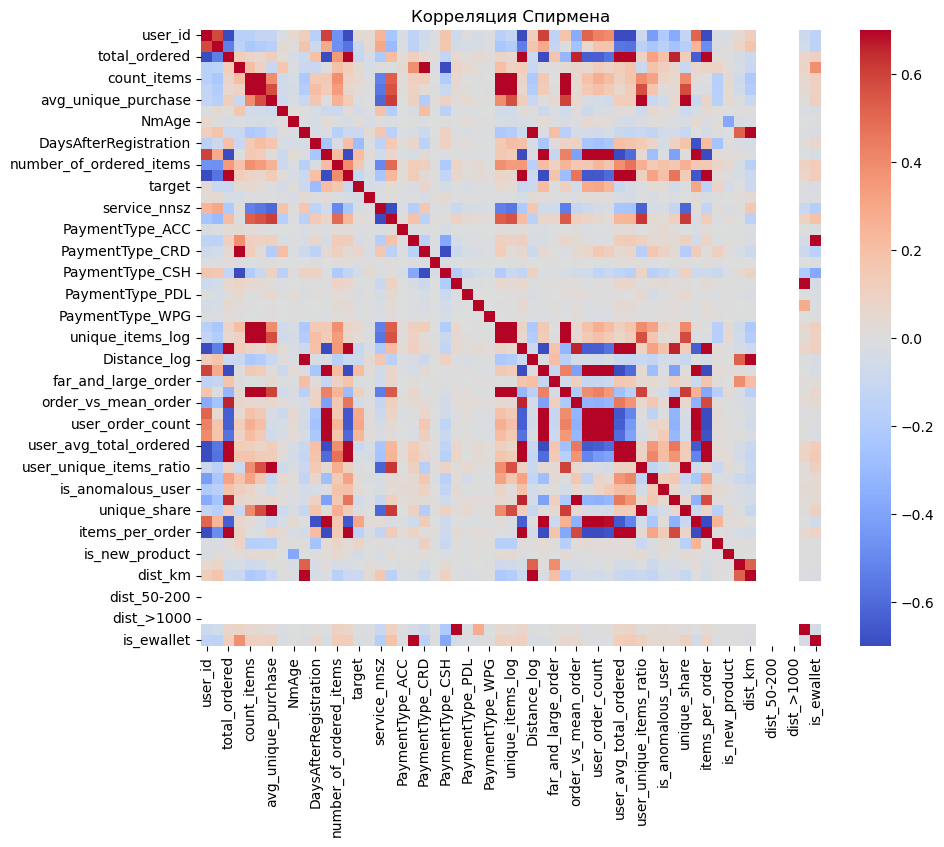

In [29]:
num_cols = data_train.select_dtypes(include=['int64','float64']).columns
corr = data_train[num_cols].corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0, vmax=.7, vmin=-.7)
plt.title('Корреляция Спирмена')
plt.show()

In [30]:
def get_highly_correlated_features(df: pd.DataFrame, threshold: float = 0.7) -> list:
    corr_matrix = df.corr(method='spearman').abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    to_drop = []
    for column in upper.columns:
        for row in upper.index:
            if upper.loc[row, column] > threshold:
                to_drop.append((row, column))

    return to_drop

In [31]:
cor_list = get_highly_correlated_features(data_train)

### 1.7 Обработка пропусков

In [33]:
def process_data(df: pd.DataFrame, correlated_features: list) -> pd.DataFrame:
    df = df.copy()

    mean_for_1 = df.loc[df['target'] == 1, 'user_avg_days_between_orders'].mean()
    mean_for_0 = df.loc[df['target'] == 0, 'user_avg_days_between_orders'].mean()

    df.loc[(df['target'] == 1) & (df['user_avg_days_between_orders'].isnull()), 'user_avg_days_between_orders'] = mean_for_1
    df.loc[(df['target'] == 0) & (df['user_avg_days_between_orders'].isnull()), 'user_avg_days_between_orders'] = mean_for_0

    columns_to_drop = ['user_id', 'nm_id']
    
    correlated_to_drop = list({pair[1] for pair in correlated_features})

    df.drop(columns=[col for col in (columns_to_drop + correlated_to_drop) if col in df.columns], inplace=True)

    return df

In [34]:
data_train = process_data(data_train, cor_list)

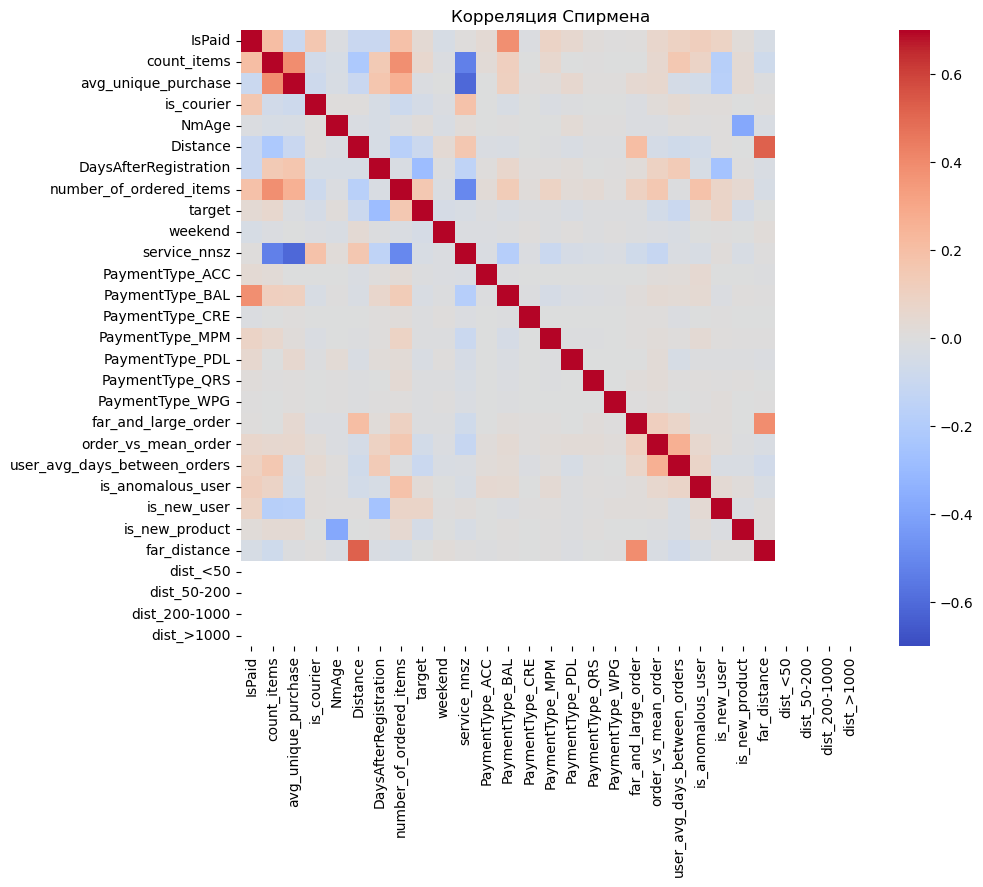

In [35]:
num_cols = data_train.select_dtypes(include=['int64','float64']).columns
corr = data_train[num_cols].corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0, vmax=.7, vmin=-.7)
plt.title('Корреляция Спирмена')
plt.show()

### 1.8 Обработка теста 

In [37]:
data_test = process_data(add_features(preprocess_base(data_test)), cor_list)

In [38]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14261 entries, 0 to 14260
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype                    
---  ------                        --------------  -----                    
 0   CreatedDate                   14261 non-null  datetime64[ns, UTC+03:00]
 1   IsPaid                        14261 non-null  int64                    
 2   count_items                   14261 non-null  int64                    
 3   avg_unique_purchase           14261 non-null  float64                  
 4   is_courier                    14261 non-null  int64                    
 5   NmAge                         14261 non-null  int64                    
 6   Distance                      14261 non-null  int64                    
 7   DaysAfterRegistration         14261 non-null  int64                    
 8   number_of_ordered_items       14261 non-null  int64                    
 9   target                        14261 non

# Обучение

### 2.1 Разбитие данных

In [41]:
from catboost import CatBoostClassifier
from sklearn.metrics import precision_recall_curve

In [42]:
X_train, y_train = data_train.drop('target', axis=1), data_train['target']
X_test, y_test = data_test.drop('target', axis=1),  data_test['target']

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train,
    test_size=0.2,      
    stratify=y_train,            
    random_state=42
)

### 2.2 Обучение

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    precision_recall_curve, classification_report, accuracy_score,
    roc_auc_score, average_precision_score, confusion_matrix, f1_score, precision_score, recall_score
)
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [46]:
X = data_train.drop('target', axis=1)
y = data_train['target']
X_test = data_test.drop('target', axis=1)
y_test = data_test['target']

In [47]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [48]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ]
)

In [49]:
X_transformed = preprocessor.fit_transform(X)
X_test_transformed = preprocessor.transform(X_test)

In [50]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_transformed, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [51]:
cb = CatBoostClassifier(
    iterations=400,
    depth=3,
    learning_rate=0.02,
    l2_leaf_reg=100000,
    class_weights=[1, 6],
    eval_metric="Precision",
    random_seed=42,
    verbose=False
)

lr = LogisticRegression(
    class_weight={0: 1, 1: 6},
    max_iter=800,
    solver='liblinear',
    random_state=42,
    C=0.00001
)

xgb = XGBClassifier(
    max_depth=3,
    scale_pos_weight=6,
    learning_rate=0.0001,
    n_estimators=300,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

In [52]:
cb.fit(X_train, y_train)
lr.fit(X_train, y_train)
xgb.fit(X_train, y_train)

/home/fedor/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:44:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [53]:
ensemble = VotingClassifier(
    estimators=[
        ('catboost', cb),
        ('logreg', lr),
        ('xgboost', xgb)
    ],
    voting='soft',
    weights=[4, 5, 4]
)

In [54]:
ensemble.fit(X_train, y_train)

/home/fedor/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:44:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


VotingClassifier(estimators=[('catboost',
                              <catboost.core.CatBoostClassifier object at 0x7fc81b9466f0>),
                             ('logreg',
                              LogisticRegression(C=1e-05,
                                                 class_weight={0: 1, 1: 6},
                                                 max_iter=800, random_state=42,
                                                 solver='liblinear')),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, devic...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.0001, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft', weights=[4, 5, 4])

### 2.3 Нахождение оптимальных гиперпараметров для валидации

In [56]:
y_valid_proba = ensemble.predict_proba(X_valid)[:, 1]
y_test_proba = ensemble.predict_proba(X_test_transformed)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_valid, y_valid_proba)

best = {'thr': 0, 'prec': 0, 'rec': 0}
for p, r, t in zip(precisions, recalls, thresholds):
    if 0.96 <= p <= 0.97:
        best = {'thr': t, 'prec': p, 'rec': r}
        break

y_valid_pred = (y_valid_proba >= best['thr']).astype(int)
y_test_pred = (y_test_proba >= best['thr']).astype(int)

### 2.4 Вывод результата метрик

In [58]:
def print_metrics(y_true, y_pred, y_prob, title=""):
    print(f"\n--- {title} ---")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score:  {f1_score(y_true, y_pred):.4f}")
    
    if y_prob is not None:
        print(f"ROC-AUC:   {roc_auc_score(y_true, y_prob):.4f}")
        print(f"PR-AUC:    {average_precision_score(y_true, y_prob):.4f}")
    
    print('\nClassification Report:')
    print(classification_report(y_true, y_pred))


    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{title} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



--- Validation ---
Accuracy:  0.9035
Precision: 0.9605
Recall:    0.2639
F1-score:  0.4141
ROC-AUC:   0.8804
PR-AUC:    0.6369

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     18007
           1       0.96      0.26      0.41      2671

    accuracy                           0.90     20678
   macro avg       0.93      0.63      0.68     20678
weighted avg       0.91      0.90      0.88     20678



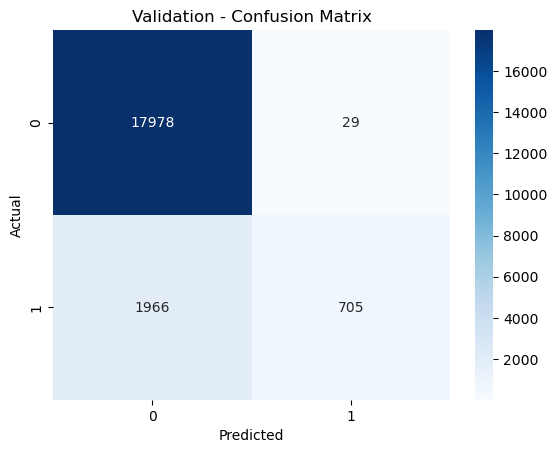


--- Test ---
Accuracy:  0.8912
Precision: 0.9262
Recall:    0.1528
F1-score:  0.2624
ROC-AUC:   0.6368
PR-AUC:    0.3539

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     12455
           1       0.93      0.15      0.26      1806

    accuracy                           0.89     14261
   macro avg       0.91      0.58      0.60     14261
weighted avg       0.89      0.89      0.86     14261



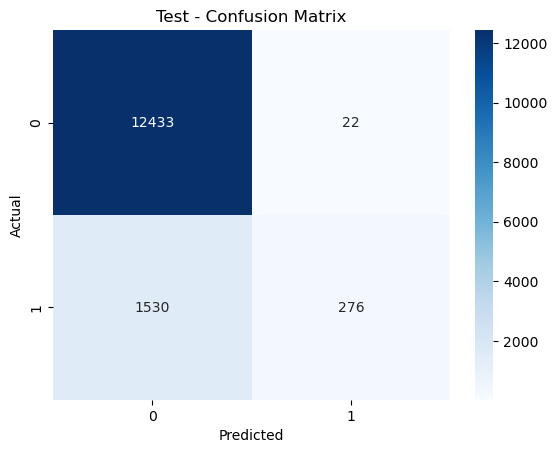

In [59]:
print_metrics(y_valid, y_valid_pred, y_valid_proba, title='Validation')
print_metrics(y_test, y_test_pred, y_test_proba, title='Test')

In [60]:
print(best)

{'thr': 0.6192686380300122, 'prec': 0.9604904632152589, 'rec': 0.2639460876076376}


# Отчет по этапам предобработки данных

### 1 Скачивание данных

На первом этапе были загружены два набора данных: тренировочный и тестовый. Скачивание происходило автоматически с помощью Python-библиотеки, позволяющей загружать файлы по ссылке. Данные были загружены в формате CSV и успешно считаны в датафреймы.

### 2 Просмотр дисбаланса классов

После загрузки данных был проведен анализ целевой переменной — `target`, которая отвечает за бинарную классификацию объектов (например, «забанить» или «оставить»). Были вычислены доли каждого класса в выборке, что позволило выявить наличие дисбаланса. Для визуализации соотношения классов была построена столбчатая диаграмма, которая наглядно продемонстрировала преобладание одного класса над другим.

### 3 Работа с выбросами

Для повышения качества модели был произведен отбор и фильтрация выбросов. Это касалось признаков, связанных с количеством заказов, уникальных товаров, расстоянием до клиента и другими количественными метриками. Были установлены пороговые значения, выше которых наблюдения считались выбросами и исключались из тренировочной выборки. Таким образом, удалось сократить влияние аномальных значений на обучение модели.

### 4 Обработка категориальных признаков

Были обработаны категориальные признаки, такие как способ оплаты (`PaymentType`) и тип услуги (`service`). Признаки, не входящие в список допустимых категорий, были заменены на наиболее часто встречающуюся категорию. Далее была проведена процедура кодирования признаков в числовой формат с использованием метода one-hot encoding. Также бинарные признаки были переведены в числовой формат, совместимый с обучающими алгоритмами.

Дополнительно был создан ряд новых признаков на основе временных данных: год, месяц, день недели, а также бинарный признак выходного дня. Эти признаки могут быть полезны для модели при выявлении паттернов поведения пользователей.

### 5 Добавление новых признаков

Была проведена генерация новых признаков для улучшения обучающей способности модели. Основные категории новых признаков:

- **Логарифмирование числовых переменных:** для признаков с положительным сдвигом (например, `total_ordered`, `Distance`, `number_of_orders`) были добавлены логарифмированные версии.
- **Комбинированные признаки:** например, `far_and_large_order`, определяющий случаи, когда заказ далеко и содержит большое количество товаров.
- **Агрегация по пользователям:** вычислены средние, максимальные и суммарные значения заказов и количества товаров на пользователя.
- **Признаки активности пользователей:** такие как частота заказов (`user_avg_days_between_orders`), признак нового пользователя (`is_new_user`) и т. д.
- **Бинарные признаки и биннинг расстояния:** расстояние до клиента было поделено на интервалы, затем закодировано.
- **Обработка способов оплаты:** были выделены признаки, отражающие использование SBP и электронных кошельков.
- **Обработка категориальных признаков:** текстовые категории были переведены в числовые с помощью one-hot кодирования.

В результате расширения пространства признаков модель получает более информативные данные, отражающие как поведение пользователя, так и характеристики заказов.

### 6 Обработка коррелирующих признаков

После добавления новых признаков была проведена корреляционная проверка с использованием коэффициента Спирмена. На тепловой карте было наглядно видно, что некоторые признаки сильно коррелируют между собой (корреляция выше 0.7).

Для устранения мультиколлинеарности был реализован алгоритм, который находит пары сильно коррелирующих признаков и отбирает те, которые необходимо удалить. Затем из обучающей и тестовой выборок удаляются избыточные признаки.

### 7 Обработка пропусков

Особое внимание было уделено признаку `user_avg_days_between_orders`, который может содержать пропуски для пользователей с единственным заказом. Такие значения были заполнены средними значениями в разрезе целевого признака:

- Для объектов с `target = 1` — средним значением по всем `user_avg_days_between_orders` с таким же таргетом.
- Аналогично для объектов с `target = 0`.

Таким образом удалось избежать искажения распределения признака и сохранить полезность информации.

### 8 Обработка теста

Для тестовой выборки была применена вся цепочка предобработки, включая:

1. Базовую очистку данных.
2. Генерацию новых признаков с помощью функции `add_features`.
3. Удаление коррелирующих признаков, определенных на тренировочной выборке.
4. Удаление лишних идентификаторов (`user_id`, `nm_id`).
5. Заполнение пропусков в `user_avg_days_between_orders` на основе средних значений по аналогии с тренировочным датасетом.

### 9 Итог

В результате была подготовлена полноценная матрица признаков с устраненными пропусками и корреляциями, пригодная для дальнейшего обучения и предсказания.


# Отчет по обучению модели

### 1 Разбитие данных

На первом этапе данные были разделены на обучающую и тестовую выборки с помощью функции `train_test_split`. После этого, из обучающей выборки был выделен дополнительный набор для валидации, чтобы затем оценить качество модели и избежать переобучения. Этот шаг позволяет эффективно использовать данные для обучения, проверки модели и её финальной оценки на тестовом наборе.

### 2 Обучение модели

На следующем этапе была подготовлена модель классификации. Для этого был использован ансамбль классификаторов, включающий CatBoost, Logistic Regression и XGBoost. Каждая из моделей была обучена на предварительно обработанных данных, и в конце был сформирован ансамбль (Voting Classifier), чтобы комбинировать результаты предсказаний всех трех моделей. Такой подход обычно повышает качество предсказаний за счет разнообразия подходов в моделях.

### 3 Нахождение оптимальных гиперпараметров

Для выбора оптимального порога классификации был использован метод анализа Precision-Recall, чтобы определить такой порог, при котором точность (Precision) была в пределах 0.96-0.97(чтобы модель не переобучилась полностью), при этом не теряя качество Recall. С помощью этого порога были сгенерированы предсказания для валидационной и тестовой выборок, что позволило получить более точные и сбалансированные результаты для задачи классификации с сильным дисбалансом классов.

### 4 Вывод результатов

На последнем этапе были вычислены основные метрики качества модели, такие как Accuracy, Precision, Recall, F1-Score, ROC-AUC и PR-AUC для валидационной и тестовой выборок. Были также построены матрицы ошибок для визуализации точности предсказаний. Эти метрики и графики помогают оценить, насколько хорошо модель справляется с задачей классификации, особенно с учетом дисбаланса классов, и позволяют выявить возможные улучшения модели.

### 5 Итог

После обучения модели на валидационной выборке, на тестовых данных были получены следующие результаты:

- **Accuracy**: `0.8912` — модель демонстрирует высокую общую точность, правильно классифицируя более 89% объектов.
- **Precision**: `0.9262` — высокая точность означает, что модель эффективно избегает ложноположительных срабатываний, корректно определяя большинство предсказанных положительных случаев.
- **Recall**: `0.1528` — полнота остаётся низкой: модель находит лишь около 15% всех истинных положительных примеров, но это соответствует требованию задачи.
- **F1-score**: `0.2624` — низкое значение F1-метрики указывает на дисбаланс между точностью и полнотой, характерный для задач с сильно несбалансированными классами.
- **ROC-AUC**: `0.6368` — модель показывает умеренную способность различать классы.
- **PR-AUC**: `0.3539` — невысокое значение PR-AUC подтверждает наличие серьёзного дисбаланса классов в данных и сложность задачи.



# Инструкция для скрытых тестов

### Функция предназначена для получения результатов на скрытых тестовых данных. Она выполняет полный цикл: от предобработки и добавления признаков до трансформации и получения предсказаний модели с последующим выводом метрик. ##
### Функция не была протестирована!!!

In [65]:
def evaluate_model(data_test, cor_list, preprocessor, ensemble, threshold, title='Test'):
    processed_data = process_data(add_features(preprocess_base(data_test)), cor_list)
    X_test = processed_data.drop('target', axis=1)
    y_test = processed_data['target']
    
    X_test_transformed = preprocessor.transform(X_test)
    y_test_proba = ensemble.predict_proba(X_test_transformed)[:, 1]
    y_test_pred = (y_test_proba >= threshold).astype(int)
    
    print_metrics(y_test, y_test_pred, y_test_proba, title=title)

In [66]:
# evaluate_model(data_test, cor_list, preprocessor, ensemble, best['thr'], title='Test')